# Netflix EDA: Genre Popularity Analysis for Movies and TV Shows (2017 vs 2019)
## Introduction
Netflix has become a dominant player in the streaming industry, providing a vast catalog of movies and TV shows across various genres. To understand trends over time, I performed an analysis comparing the genre distribution of Netflix's movie and TV show releases in 2017 and 2019.

In this analysis, I focus on the following objectives:

Compare genre popularity for movies and TV shows released in 2017 and 2019.
Identify trends or shifts in Netflix's content strategy based on genre preferences.
The dataset used contains information such as title, type (movie or TV show), release year, and the listed genres.

## Dataset Overview
The dataset contains the following key columns:

- title: Name of the movie or TV show.
- type: Specifies whether the content is a movie or TV show.
- release_year: The year the title was released on Netflix.
- listed_in: The genres associated with the title, separated by commas.

## Data Preparation
Filtered the data for titles released in the years 2017 and 2019.
Split multiple genres listed in the listed_in column to ensure proper grouping and analysis of individual genres.
Separated the dataset into movies and TV shows to analyze the genre popularity for each type separately.
The following code was used to perform the filtering, separation, and genre splitting:

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles_1.csv')

df_filtered = df[df['release_year'].isin([2017, 2019])]

movies = df_filtered[df_filtered['type'] == 'Movie'].copy()
tv_shows = df_filtered[df_filtered['type'] == 'TV Show'].copy()

movies.loc[:, 'listed_in'] = movies['listed_in'].str.split(', ')
tv_shows.loc[:, 'listed_in'] = tv_shows['listed_in'].str.split(', ')

movies_exploded = movies.explode('listed_in')
tv_shows_exploded = tv_shows.explode('listed_in')

## Movies: Genre Popularity in 2017 and 2019
The plot below shows the distribution of genres for movies released in 2017 and 2019 on Netflix. The graph is a stacked bar chart where each genre is represented as a segment within the bars.


<Figure size 1200x800 with 0 Axes>

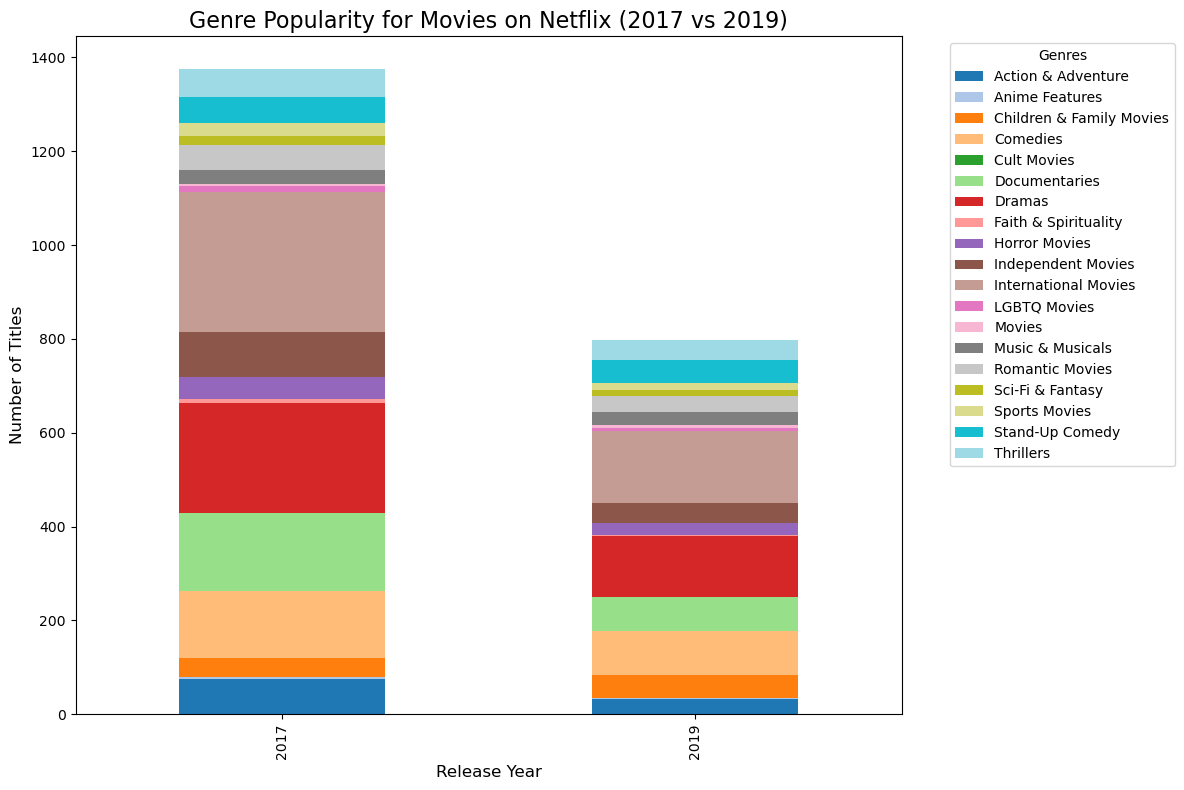

In [43]:
movies_genre_year = movies_exploded.groupby(['release_year', 'listed_in']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
movies_genre_year.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))
plt.title('Genre Popularity for Movies on Netflix (2017 vs 2019)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights:


## TV Shows: Genre Popularity in 2017 and 2019
Similarly, we analyzed the genre distribution for TV shows released in 2017 and 2019. The following stacked bar chart illustrates the results.

<Figure size 1200x800 with 0 Axes>

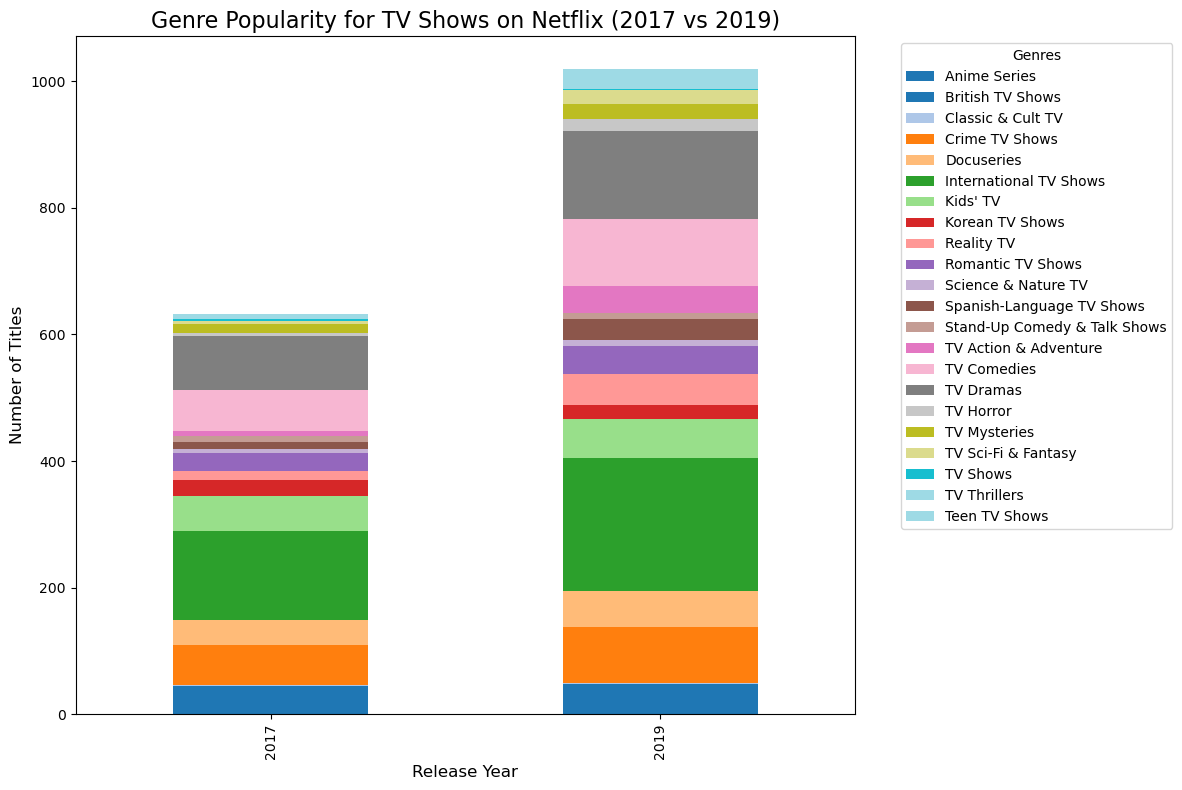

In [35]:
tv_genre_year = tv_shows_exploded.groupby(['release_year', 'listed_in']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
tv_genre_year.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))
plt.title('Genre Popularity for TV Shows on Netflix (2017 vs 2019)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights:


## Conclusion
This analysis provides an overview of genre trends for movies and TV shows released on Netflix in 2017 and 2019. From the graphs, it is evident that Netflix's content strategy may have evolved, with certain genres gaining or losing popularity over time. This information can be useful for content creators and platform analysts looking to align with viewer preferences.